<a href="https://colab.research.google.com/github/manikcb/sem_project/blob/main/updated1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 19.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd


In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset/cyberharassdata2.csv")
df.head(10)

,tweet_text,cyberharass_type
0,@taylorswift13 red is amazin !!! :D,non_cyberharass
1,@Ladieslovesloj Lool Ikr @realmadrid Players A...,non_cyberharass
2,@beardyblue I went through that my first night...,non_cyberharass
3,Can't quite shake the feeling that #MKR is a t...,cyberharass
4,"Seriously! ""@diasporaoflove: â€œ@tayyoung_: FU...",cyberharass
5,I'm sure suburban women love hearing a republi...,cyberharass
6,I can't handle all the sass at Sassy. Feisty ...,non_cyberharass
7,YOU ARE ALL FILTHY DISGUSTING NIGGERS: I HOPE ...,cyberharass
8,Because Iâ€™m pretty sure weâ€™re way past tha...,cyberharass
9,You're not going to get the response you're lo...,non_cyberharass


In [8]:
len(df),df.index.shape[-1]

(15096, 15096)

In [9]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [10]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [15]:
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (15096, 2)


In [17]:
good_reviews=df[df['cyberharass_type']=='cyberharass']['tweet_text']
bad_reviews=df[df['cyberharass_type']==' non_cyberharass']['tweet_text']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 3     Can't quite shake the feeling that #MKR is a t...
4     Seriously! "@diasporaoflove: â€œ@tayyoung_: FU...
5     I'm sure suburban women love hearing a republi...
7     YOU ARE ALL FILTHY DISGUSTING NIGGERS: I HOPE ...
8     Because Iâ€™m pretty sure weâ€™re way past tha...
10    â€œ@disrespectniall: you all complain about sm...
11    cyberharass is a social construct. Why are we ...
12    @UNODOSTRAYCE_ how about you shut the fuck up ...
13    Biden has mentioned anything about the babies ...
14    RT @FeministMirror: @beerandfeminism @MT8_9 @s...
Name: tweet_text, dtype: object
First 10 samples of bad reviews
 Series([], Name: tweet_text, dtype: object)


Total Counts of both sets SPOCK DIED???                                                                                                                                                                           2
RT @DustyPee: If #cuntandandre make it through, I'll... I don't know what I will do. #mkr                                                                                               2
@fdgonthier a lot of people contribute just a little bit, and it turns into enough to keep me afloat. every dollar is immensely appreciated.                                            2
@pennozewyatt can you follow for a DM?                                                                                                                                                  2
@alain_vde patron?                                                                                                                                                                      2
                                            

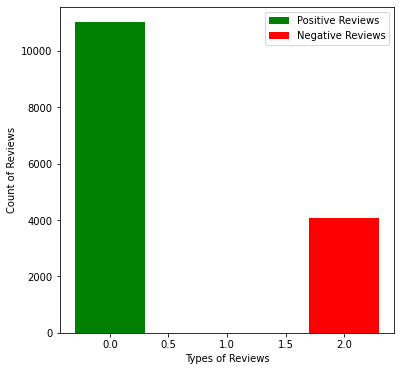

In [25]:
count=df['tweet_text'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=df[df['cyberharass_type']=='cyberharass']
count_bad=df[df['cyberharass_type']=='non_cyberharass']
plot_counts(len(count_good),len(count_bad))


Positive Review Words:3        23
4        13
5        19
7        24
8        51
         ..
15091    27
15092    21
15093    11
15094    23
15095    15
Name: tweet_text, Length: 11016, dtype: int64
Negative Review Words:0         6
1        10
2        24
6        15
9        13
         ..
15075    20
15076    10
15080    25
15081    18
15088     2
Name: tweet_text, Length: 4080, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



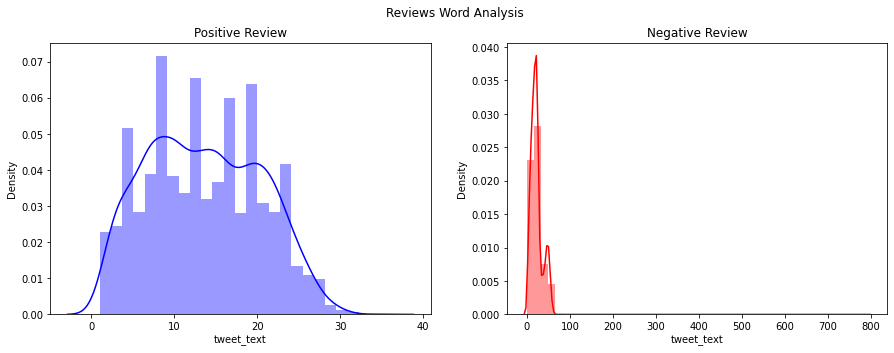

In [26]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['tweet_text'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['tweet_text'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



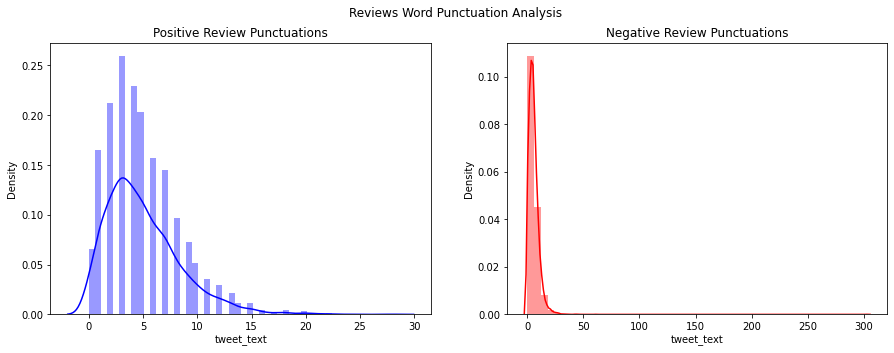

In [27]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_good_punctuations=count_good['tweet_text'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['tweet_text'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive Review Punctuations","Negative Review Punctuations","Reviews Word Punctuation Analysis")

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'ourselves', 'couldn', 'needn', 'theirs', 'had', "needn't", 'hadn', 'd', "hadn't", 'because', 'him', 'its', "that'll", 'each', 'or', 'few', 'shan', 'when', 'we', 'their', 'so', 'will', 'y', 'through', 'our', 'where', 'she', 'is', 'who', "haven't", 'just', 'out', 'off', 'here', 'herself', 't', 'most', 'he', 'her', 'are', 'your', 'that', 'and', 'then', 'll', 'from', 'by', "won't", 'same', 'whom', 'should', 'until', 'about', 'how', 'to', 'into', "isn't", 'themselves', 'only', "weren't", 'over', 'can', 'does', 'be', 'before', 'ma', 'don', 'now', 'm', 'than', 'wouldn', 'o', 'doing', 's', 'ours', 'once', 'at', 'am', 'it', 'why', "you'll", 'after', "it's", 'against', 'aren', 'some', "didn't", 'mightn', 'an', 'those', 'the', 'them', 'too', 'any', 'himself', 'has', "wouldn't", 'as', 'have', 'such', "shouldn't", 'hers', 'of', 'nor', 'his', 'were', 'no', 've', 'myself', 'do', 'on', "mustn't", "you'd", 'but', "should've", 'in', 'up', 'below', 'weren', 'which', 'further', "aren't", 'haven', 'yours

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



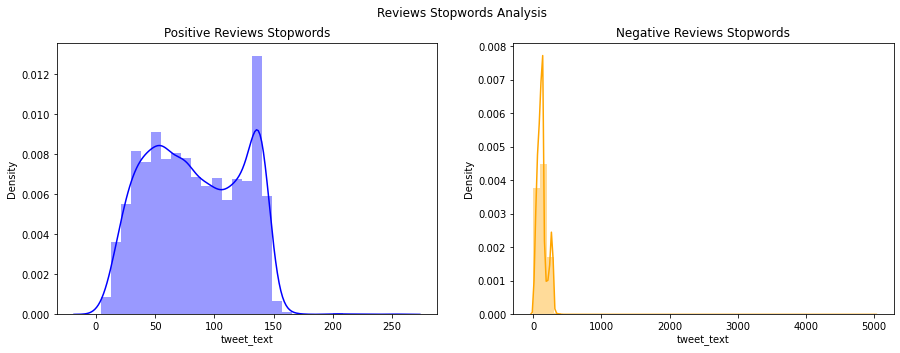

In [31]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=count_good['tweet_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['tweet_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



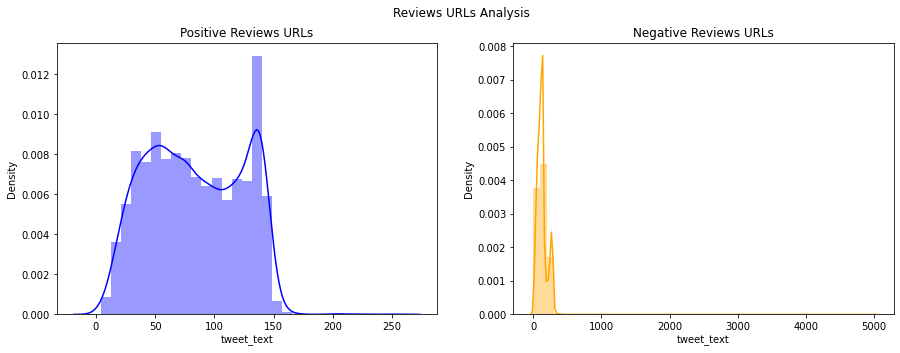

In [32]:
## Checking number of Urls
count_good_urls=count_good['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

In [33]:
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()


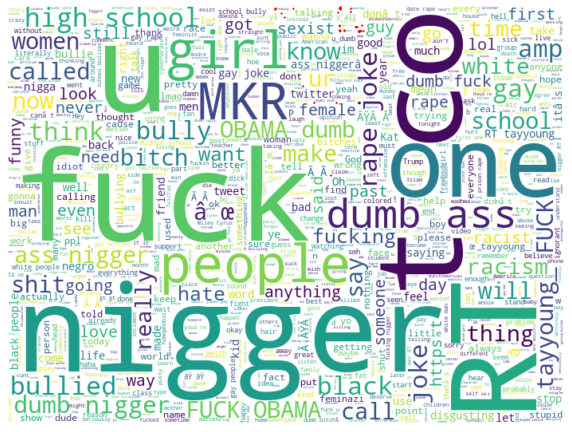

In [35]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=3000, max_font_size=156,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(df['tweet_text'],'/content/drive/MyDrive/dataset/wp5511321.jpg','red')

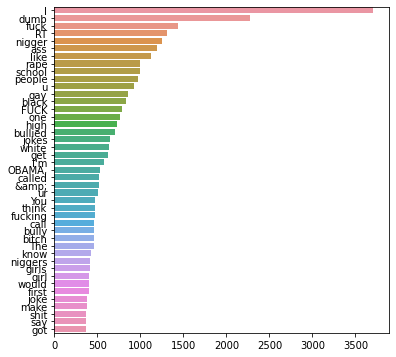

In [36]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in df[df['cyberharass_type']==word]['tweet_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('cyberharass')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [37]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_bad['tweet_text']
train_df_ones=count_good['tweet_text']

print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis


/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Penta-gram analysis


In [38]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

df['tweet_text']=df['tweet_text'].apply(lambda z: remove_punctuations(z))

df['tweet_text']=df['tweet_text'].apply(lambda z: remove_html(z))
df['tweet_text']=df['tweet_text'].apply(lambda z: remove_url(z))
df['tweet_text']=df['tweet_text'].apply(lambda z: remove_emoji(z))

CPU times: user 430 ms, sys: 0 ns, total: 430 ms
Wall time: 926 ms


In [39]:
df.head(10)

,tweet_text,cyberharass_type
0,taylorswift13 red is amazin D,non_cyberharass
1,Ladieslovesloj Lool Ikr realmadrid Players Are...,non_cyberharass
2,beardyblue I went through that my first night ...,non_cyberharass
3,Cant quite shake the feeling that MKR is a tin...,cyberharass
4,Seriously diasporaoflove âœtayyoung_ FUCK OBAM...,cyberharass
5,Im sure suburban women love hearing a republic...,cyberharass
6,I cant handle all the sass at Sassy Feisty f...,non_cyberharass
7,YOU ARE ALL FILTHY DISGUSTING NIGGERS I HOPE Y...,cyberharass
8,Because Iâm pretty sure weâre way past that as...,cyberharass
9,Youre not going to get the response youre look...,non_cyberharass


In [42]:
df_harass = df[df['cyberharass_type']=='cyberharass']
df_not_harass = df[df['cyberharass_type']=='non_cyberharass']

In [43]:
df_not_harass_downsampled = df_not_harass.sample(df_harass.shape[0],replace=True)
df_balanced = pd.concat([df_not_harass_downsampled, df_harass])
df_balanced['cyberharass_type'].value_counts()

non_cyberharass    11016
cyberharass        11016
Name: cyberharass_type, dtype: int64

In [44]:
df_balanced['cyberharass']=df_balanced['cyberharass_type'].apply(lambda x: 1 if x=='cyberharass' else 0)
df_balanced.sample(2)

,tweet_text,cyberharass_type,cyberharass
6095,Say NO to violent bully rhetoric Say NO to cow...,non_cyberharass,0
11579,Economic oppression ffs thats half the bloody ...,cyberharass,1


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['tweet_text'],df_balanced['cyberharass'], stratify=df_balanced['cyberharass'])
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [46]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)
model.fit(X_train, y_train, epochs=1)
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

  1/517 [..............................] - ETA: 4:49:34 - loss: 0.7075 - accuracy: 0.5312 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: ignored